In [333]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, LSTM, GRU
from tensorflow.keras.models import Sequential

In [334]:
path = 'C:/Users/User/Desktop/Data_Science/TimeSeries/ExchangePrices'
doc = os.path.join(path, 'prices.csv')

In [335]:
data = pd.read_csv(doc)
data.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [336]:
df = data[data['symbol'] == 'ABT']

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1762 entries, 256 to 850770
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1762 non-null   object 
 1   symbol  1762 non-null   object 
 2   open    1762 non-null   float64
 3   close   1762 non-null   float64
 4   low     1762 non-null   float64
 5   high    1762 non-null   float64
 6   volume  1762 non-null   float64
dtypes: float64(5), object(2)
memory usage: 110.1+ KB


In [338]:
data['symbol'].unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [339]:
date_splitted = df['date'].str.split(' ', expand = True)

In [340]:
df['date_upd'] = date_splitted.iloc[:, 0]

C:\Users\User\AppData\Local\Temp\ipykernel_12448\689043776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_upd'] = date_splitted.iloc[:, 0]


In [341]:
df['date_upd'] = pd.to_datetime(df['date_upd'])

C:\Users\User\AppData\Local\Temp\ipykernel_12448\3122583271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_upd'] = pd.to_datetime(df['date_upd'])


<Figure size 1000x500 with 0 Axes>

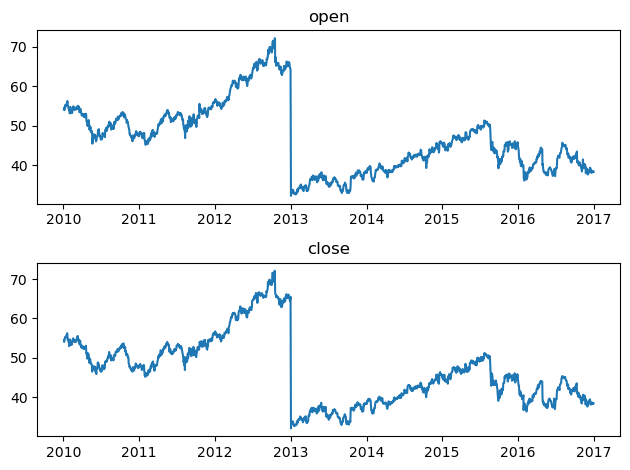

In [342]:
plt.figure(figsize = (10, 5))
fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(df['date_upd'], df['open'])
ax1.set_title('open')
ax2.plot(df['date_upd'], df['close'])
ax2.set_title('close')

plt.tight_layout()
plt.show()

In [343]:
df_train, df_test = train_test_split(df, test_size = 0.2, shuffle = False)

In [344]:
df_train = df_train.drop(columns = ['date', 'date_upd', 'symbol'])
df_test = df_test.drop(columns = ['date', 'date_upd', 'symbol'])

In [345]:
def create_sequence(x, y, n = 12):
    x_seq = []
    y_seq = []
    y = x[:, :y+1]
    for i in range(len(x) - n):
        x_seq.append(x[i:i+n])
        y_seq.append(y[i+n])

    return np.array(x_seq), np.array(y_seq)

In [346]:
df_train.head()

,open,close,low,high,volume
256,54.189953,54.459951,53.919951,54.559954,10829000.0
723,54.469953,54.019953,53.749951,54.469953,10562100.0
1191,53.939950,54.319953,53.849954,54.389950,11401400.0
1659,54.309951,54.769952,54.069951,54.779950,12857200.0
2127,54.759951,55.049952,54.679952,55.249950,12148600.0


In [347]:
scaler = StandardScaler()
df_train_sc = scaler.fit_transform(df_train)
df_test_sc = scaler.transform(df_test)

In [348]:
df_train_sc

array([[ 0.65686341,  0.68347189,  0.66769478,  0.65688686, -0.12062416],
       [ 0.68719197,  0.63588631,  0.64920403,  0.64718965, -0.15624023],
       [ 0.62978401,  0.66833117,  0.66008127,  0.63856969, -0.04424108],
       ...,
       [ 0.30917319,  0.25304203,  0.28374499,  0.27331778, -0.89408952],
       [ 0.2593477 ,  0.2357381 ,  0.24893897,  0.27439502, -0.73657278],
       [ 0.24634996,  0.2130268 ,  0.17280048,  0.21298018, -0.98496456]])

In [349]:
x_train, y_train = create_sequence(df_train_sc, 1)

In [350]:
y_train

array([[0.87566222, 0.80243638],
       [0.78034388, 0.68887947],
       [0.71860348, 0.70942789],
       ...,
       [0.30917319, 0.25304203],
       [0.2593477 , 0.2357381 ],
       [0.24634996, 0.2130268 ]])

In [351]:
x_train

array([[[ 0.65686341,  0.68347189,  0.66769478,  0.65688686,
         -0.12062416],
        [ 0.68719197,  0.63588631,  0.64920403,  0.64718965,
         -0.15624023],
        [ 0.62978401,  0.66833117,  0.66008127,  0.63856969,
         -0.04424108],
        ...,
        [ 0.78359315,  0.79486581,  0.80256871,  0.76570929,
          0.58709358],
        [ 0.80417314,  0.87165198,  0.84063758,  0.86591273,
          0.65796543],
        [ 0.87782843,  0.87597785,  0.85151471,  0.89715903,
          0.31328081]],

       [[ 0.68719197,  0.63588631,  0.64920403,  0.64718965,
         -0.15624023],
        [ 0.62978401,  0.66833117,  0.66008127,  0.63856969,
         -0.04424108],
        [ 0.66986115,  0.71699835,  0.68401015,  0.68059044,
          0.150026  ],
        ...,
        [ 0.80417314,  0.87165198,  0.84063758,  0.86591273,
          0.65796543],
        [ 0.87782843,  0.87597785,  0.85151471,  0.89715903,
          0.31328081],
        [ 0.87566222,  0.80243638,  0.78516544, 

In [352]:
x_test, y_test = create_sequence(df_test_sc, 1)

In [353]:
model_1 = Sequential()
model_1.add(LSTM(units = 50, input_shape = (12, 5)))
model_1.add(Dense(2))

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [354]:
model_1.compile(optimizer = 'adam', loss = 'mse')

In [355]:
history = model_1.fit(x_train, y_train, batch_size = 8, epochs = 100)

Epoch 1/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.1496
Epoch 2/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0230
Epoch 3/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0287
Epoch 4/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0273
Epoch 5/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0221
Epoch 6/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0189
Epoch 7/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0076
Epoch 8/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0261
Epoch 9/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0327
Epoch 10/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0157
Epoch 11/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0091
Epoch 12/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0050
Epoch 13/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0176
Epoch 14/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0047
Epoch 15/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1

In [356]:
train_predictions = model_1.predict(x_train)
test_predictions = model_1.predict(x_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [357]:
inverse_train_df = np.zeros((df_train.shape[0] - 12, df_train.shape[1]))
inverse_train_df[:, 0] = train_predictions[:, 0].flatten()
inverse_train_df[:, 1] = train_predictions[:, 1].flatten()
train_predictions_rl = scaler.inverse_transform(inverse_train_df)[:,:2]

inverse_test_df = np.zeros((df_test.shape[0] -12 , 5))
inverse_test_df[:, 0] = test_predictions[:, 0].flatten()
inverse_test_df[:, 1] = test_predictions[:, 1].flatten()
test_predictions_rl = scaler.inverse_transform(inverse_test_df)[:, :2]

In [358]:
train_predictions.shape

(1397, 2)

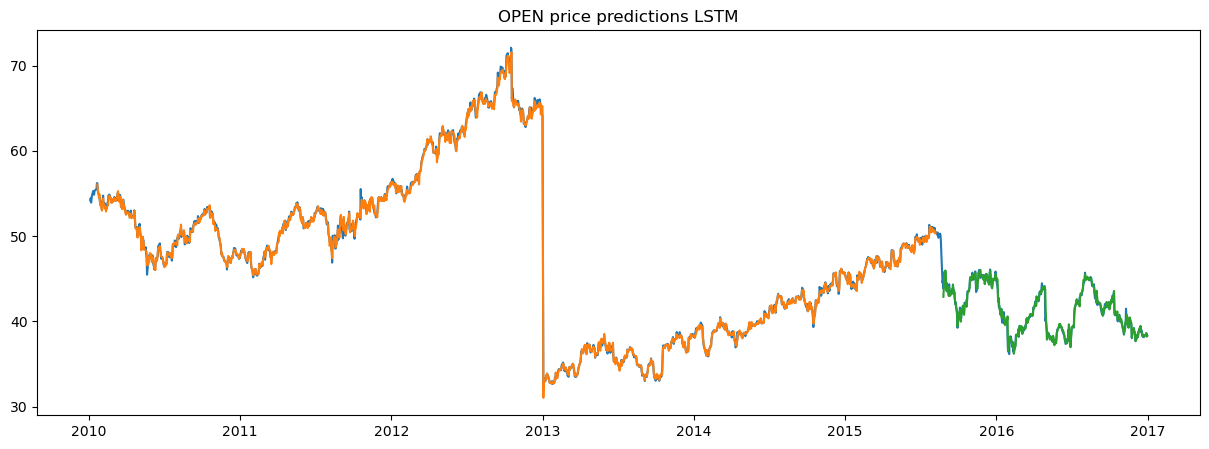

In [363]:
plt.figure(figsize = (15, 5))
plt.plot(df['date_upd'], df['open'], label = 'real')
plt.plot(df['date_upd'][12:1409],train_predictions_rl[:, 0], label = 'train_pred')
plt.plot(df['date_upd'][1421:], test_predictions_rl[:, 0], label = 'test_predictions')

plt.title('OPEN price predictions LSTM')
plt.show()

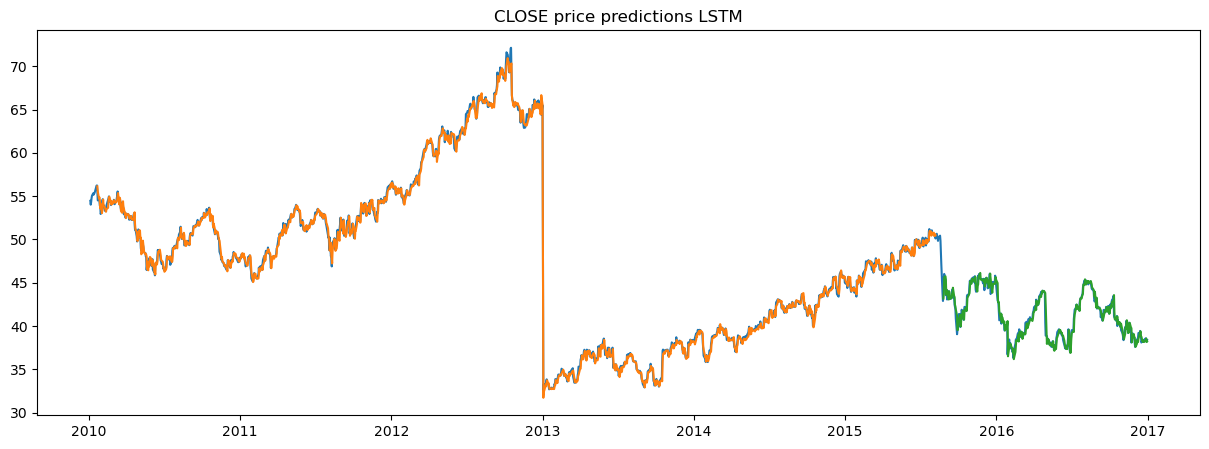

In [367]:
plt.figure(figsize = (15, 5))
plt.plot(df['date_upd'], df['close'], label = 'real')
plt.plot(df['date_upd'][12:1409],train_predictions_rl[:, 1], label = 'train_pred')
plt.plot(df['date_upd'][1421:], test_predictions_rl[:, 1], label = 'test_predictions')

plt.title('CLOSE price predictions LSTM')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [369]:
mae = mean_absolute_error(df['open'][1421:], test_predictions_rl[:, 0])
mse = mean_squared_error(df['open'][1421:], test_predictions_rl[:, 0])

print(f'OPEN Prediction MAE: {mae}')
print(f'OPEN Prediction MSE: {mse}')

OPEN Prediction MAE: 0.2579060210750476
OPEN Prediction MSE: 0.18347341865749386


In [371]:
mae_cl = mean_absolute_error(df['open'][1421:], test_predictions_rl[:, 1])
mse_cl = mean_squared_error(df['open'][1421:], test_predictions_rl[:, 1])

print(f'CLOSE Prediction MAE: {mae_cl}')
print(f'CLOSE Prediction MSE: {mse_cl}')

CLOSE Prediction MAE: 0.25810354668335794
CLOSE Prediction MSE: 0.1930097239799955


### GRU Model

In [373]:
model_2 = Sequential()
model_2.add(GRU(units = 50, input_shape = (12, 5)))
model_2.add(Dense(2))

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [375]:
model_2.compile(optimizer = 'adam', loss = 'mse')

In [377]:
history_2 = model_2.fit(x_train, y_train, batch_size = 8, epochs = 100)

Epoch 1/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.1793
Epoch 2/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0088
Epoch 3/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0254
Epoch 4/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0086
Epoch 5/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0043
Epoch 6/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0245
Epoch 7/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0133
Epoch 8/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0047
Epoch 9/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0112
Epoch 10/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0097
Epoch 11/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0195
Epoch 12/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0117
Epoch 13/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0204
Epoch 14/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0080
Epoch 15/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1

In [379]:
train_predictions_gru = model_2.predict(x_train)
test_predictions_gru = model_2.predict(x_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [381]:
inverse_train_df_2 = np.zeros((df_train.shape[0] - 12, df_train.shape[1]))
inverse_train_df_2[:, 0] = train_predictions_gru[:, 0].flatten()
inverse_train_df_2[:, 1] = train_predictions_gru[:, 1].flatten()
train_predictions_rl_gru = scaler.inverse_transform(inverse_train_df_2)[:,:2]

inverse_test_df_2 = np.zeros((df_test.shape[0] -12 , 5))
inverse_test_df_2[:, 0] = test_predictions_gru[:, 0].flatten()
inverse_test_df_2[:, 1] = test_predictions_gru[:, 1].flatten()
test_predictions_rl_gru = scaler.inverse_transform(inverse_test_df_2)[:, :2]

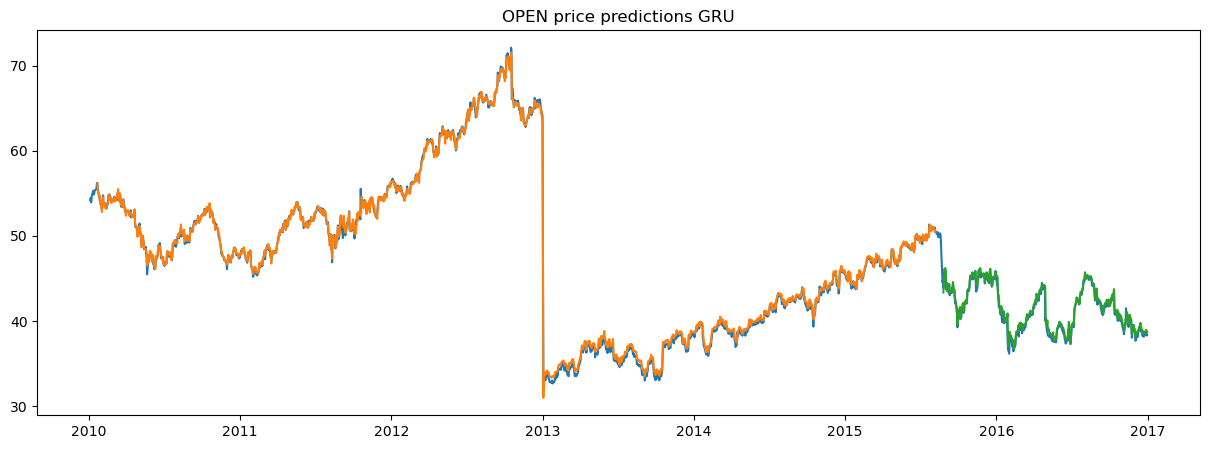

In [383]:
plt.figure(figsize = (15, 5))
plt.plot(df['date_upd'], df['open'], label = 'real')
plt.plot(df['date_upd'][12:1409],train_predictions_rl_gru[:, 0], label = 'train_pred')
plt.plot(df['date_upd'][1421:], test_predictions_rl_gru[:, 0], label = 'test_predictions')

plt.title('OPEN price predictions GRU')
plt.show()

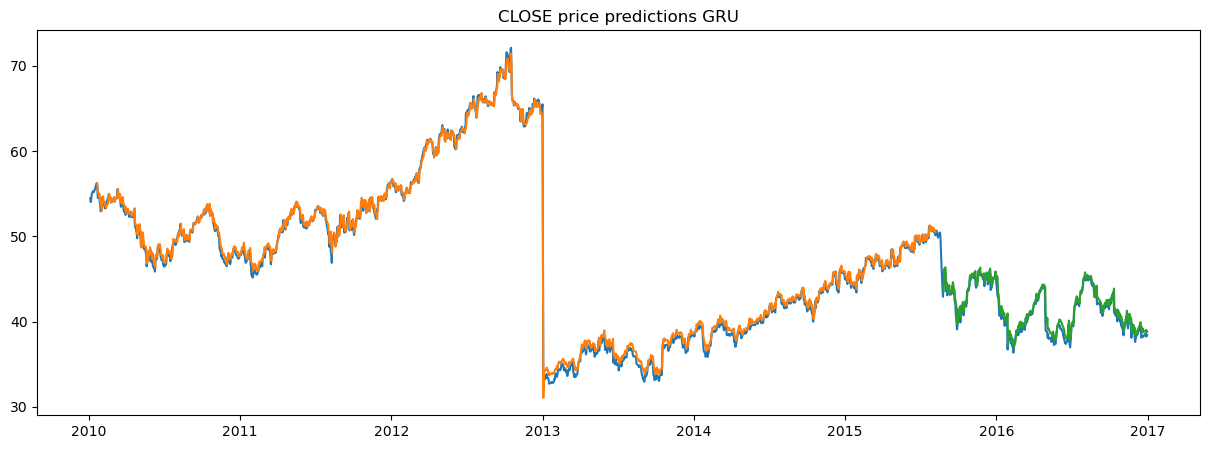

In [385]:
plt.figure(figsize = (15, 5))
plt.plot(df['date_upd'], df['close'], label = 'real')
plt.plot(df['date_upd'][12:1409],train_predictions_rl_gru[:, 1], label = 'train_pred')
plt.plot(df['date_upd'][1421:], test_predictions_rl_gru[:, 1], label = 'test_predictions')

plt.title('CLOSE price predictions GRU')
plt.show()

In [387]:
mae_gru = mean_absolute_error(df['open'][1421:], test_predictions_rl_gru[:, 0])
mse_gru = mean_squared_error(df['open'][1421:], test_predictions_rl_gru[:, 0])

print(f'OPEN Prediction MAE GRU: {mae_gru}')
print(f'OPEN Prediction MSE GRU: {mse_gru}')

OPEN Prediction MAE GRU: 0.36903379509023865
OPEN Prediction MSE GRU: 0.26444401162384423


In [389]:
mae_gru_cl = mean_absolute_error(df['open'][1421:], test_predictions_rl_gru[:, 1])
mse_gru_cl = mean_squared_error(df['open'][1421:], test_predictions_rl_gru[:, 1])

print(f'CLOSE Prediction MAE GRU: {mae_gru_cl}')
print(f'CLOSE Prediction MSE GRU: {mse_gru_cl}')

CLOSE Prediction MAE GRU: 0.4687289153296809
CLOSE Prediction MSE GRU: 0.36638998888262053
